In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import rcParams
import seaborn as sns
import pandas as pd

In [2]:
sns.set_context('paper')
rcParams['font.size'] = 10

In [3]:
%matplotlib inline

In [12]:
group = 50
delta = '0-05'
sample = 10

meas1 = 'alpha_score'
meas2 = 'chord_arc_infinity'
measure_one = '$\\alpha$ fatness'
measure_two = 'Arc $L_\infty$'

input_dir = f'../data/input/mitchell_polygons/{group}/'
output_dir =f'../data/output/mitchell_polygons/{group}/'

u_meas_1_scores = pd.read_csv(output_dir + f'u_{meas1}.csv')
u_meas_2_scores = pd.read_csv(output_dir + f'u_{meas2}.csv')

u_polygons = []
for i in range(1,11):
    u_polygons.append(Polygon(np.loadtxt(input_dir +  '{}.poly'.format(i), skiprows=1)))

u_meas_1_scores['Polygon'] = u_polygons
    
unsmoothed = u_meas_2_scores.set_index('n').join(u_meas_1_scores.set_index('n'), lsuffix=f' {measure_two}', rsuffix=f' {measure_one}').iloc[:sample]

u_fine_asorted = unsmoothed.sort_values(f'0.05 {measure_one}',ascending=True)[[f'0.05 {measure_two}', f'0.05 {measure_one}', 'Polygon']]
u_fine_csorted = unsmoothed.sort_values(f'0.05 {measure_two}',ascending=False)[[f'0.05 {measure_two}', 'Polygon']]

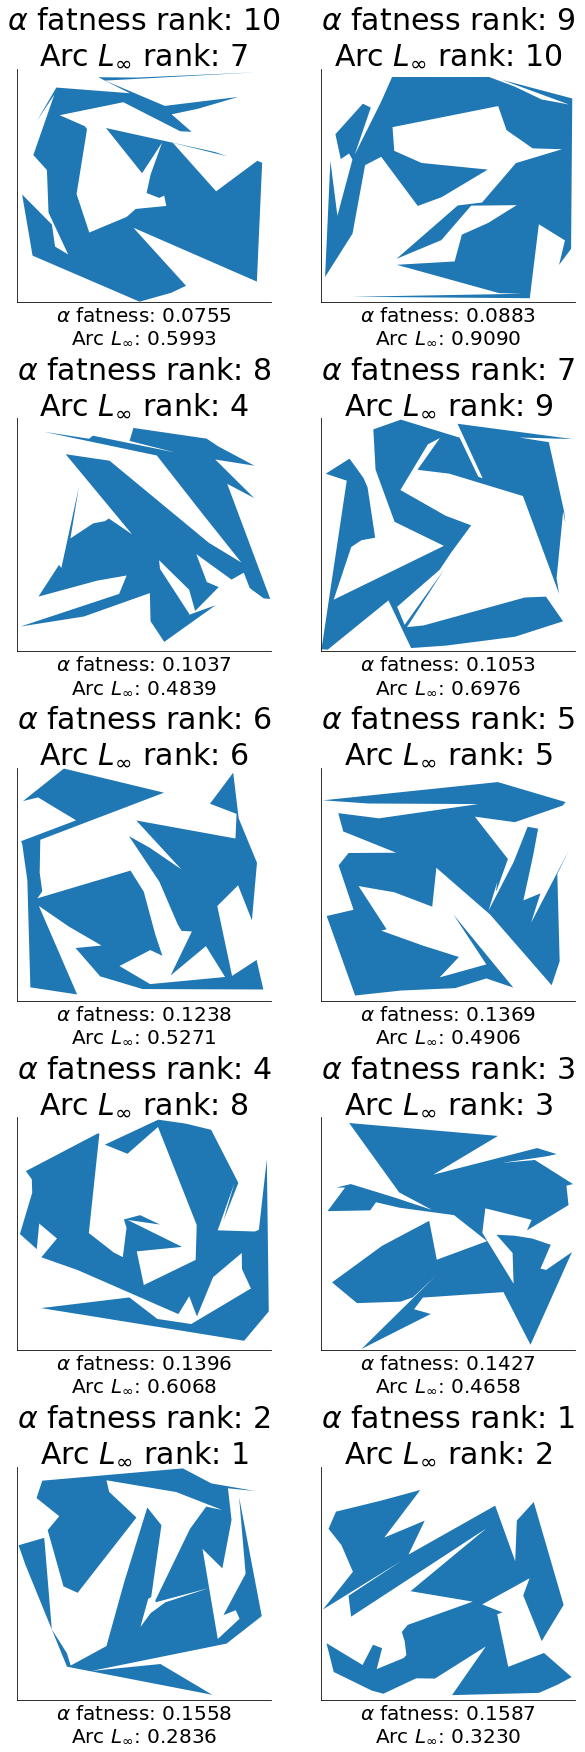

In [13]:
fig_u, axes_u = plt.subplots(5,2,figsize=(10,30))
for (i, ax) in enumerate(axes_u.reshape(sample,)):
    m1_rank = i
    polygon_name = u_fine_asorted.iloc[i].name
    m2_rank = u_fine_csorted.index.get_loc(u_fine_asorted.iloc[i].name)
    p = PatchCollection([u_fine_asorted['Polygon'].iloc[i]])
    ax.add_collection(p)
    ax.get_yaxis().set_visible(False)
    ax.set_xticks([])
    ax.set_title(f'{measure_one} rank: {sample - m1_rank}\n{measure_two} rank: {sample - m2_rank}', fontsize=30)
    ax.set_xlabel(f'{measure_one}: {(u_fine_asorted[f"0.05 {measure_one}"].iloc[i]):.4f}\n{measure_two}: {(u_fine_asorted[f"0.05 {measure_two}"].iloc[i]):.4f}', fontsize=20)
    sns.despine(ax=ax)
    
plt.subplots_adjust(hspace=0.5)
    
fig_u.savefig(f'../plots/u_{group}_{meas1}_{meas2}_vertices_{delta}_delta_ranking.jpg', bbox_inches='tight')